<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Исследовательский-анализ,-подготовка-данных" data-toc-modified-id="Исследовательский-анализ,-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ, подготовка данных</a></span></li><li><span><a href="#Разделение-на-выборки-для-обучения,-нормализация-данных" data-toc-modified-id="Разделение-на-выборки-для-обучения,-нормализация-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение на выборки для обучения, нормализация данных</a></span></li><li><span><a href="#Обучение,-валидация" data-toc-modified-id="Обучение,-валидация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение, валидация</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Метод-k-ближайших-соседей" data-toc-modified-id="Метод-k-ближайших-соседей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Метод k ближайших соседей</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Проверка-на-вменяемость" data-toc-modified-id="Проверка-на-вменяемость-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка на вменяемость</a></span></li></ul></div>

# Переход на новый тарифный план

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами.

**Цель**: проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф, с максимально большим значением *accuracy* (0.75 или больше). Проверим *accuracy* на тестовой выборке.

**План работы:**
1. Откроем файл с данными и изучим его. `users_behavior.csv`
2. Разделим исходные данные на обучающую, валидационную и тестовую выборки.
3. Исследуем качество разных моделей, меняя гиперпараметры. Кратко опишем выводы исследования.
4. Проверим качество модели на тестовой выборке.
5. Проверим модели на вменяемость.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
from random import seed
from random import random
import statistics

In [2]:
#warnings.simplefilter("once")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pth1 = '/datasets/users_behavior.csv'
pth2 = 'users_behavior.csv'
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


В таблице 5 столбцов, 3214 строк. Пропусков данных нет. Предобработка и исследовательский анализ данных не требуются, т.к. были сделаны в ранее другом проекте.

* `сalls` — количество звонков,
* `minutes` — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used` — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца (***«Ультра» — 1, «Смарт» — 0***).

## Исследовательский анализ, подготовка данных

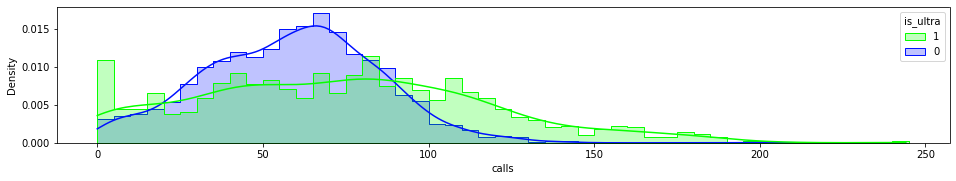

In [5]:
fig, ax = plt.subplots(figsize=(16,2.5))
sns.histplot(df, x='calls', hue='is_ultra', hue_order=[1,0]
             , stat='density', kde=True, element='step', binwidth=5
             , common_norm=False, log_scale=False, palette='hsv', fill=True, ax=ax)
plt.show();

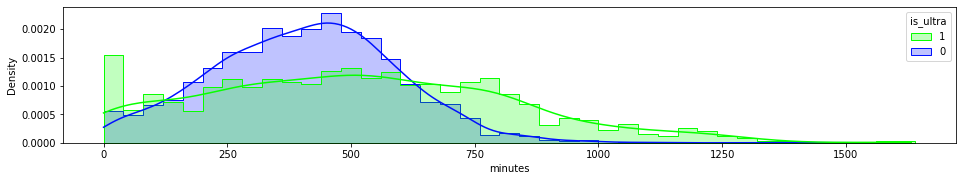

In [6]:
fig, ax = plt.subplots(figsize=(16,2.5))
sns.histplot(df, x='minutes', hue='is_ultra', hue_order=[1,0]
             , stat='density', kde=True, element='step', binwidth=40
             , common_norm=False, log_scale=False, palette='hsv', fill=True, ax=ax)
plt.show();

Можно заметить, что рисунки распределения кол-ва звонков и общей длительности разговоров очень похожи.

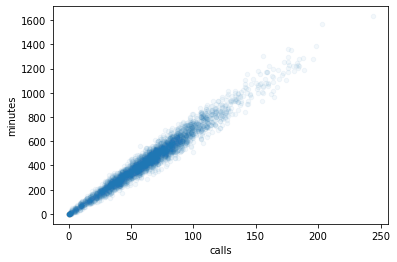

In [7]:
df.plot(kind='scatter', x='calls', y='minutes', alpha=0.05);

Видна чёткая линейная зависимость. Проверим корреляцию:

In [8]:
print('Коэф-т корреляции Пирсона:', df['calls'].corr(df['minutes']))

Коэф-т корреляции Пирсона: 0.9820832355742294


Очень высокий показатель. Поскольку у этих 2 переменных такая сильная зависимость, для обучения моделей лучше оставить одну из них, пусть это будет `minutes`. Столбец `calls` добавлять в признаки не будем.

## Разделение на выборки для обучения, нормализация данных
Разобьём выборку на признаки, целевой признак, а также на тренировочную, валидационную и тестовую выборки.
<br>Признаки нормализуем.
<br>В нашем случае целевой признак - это `is_ultra`, а задача - бинарная классификация.

In [9]:
# Признаки:
features = df.drop(columns=['is_ultra', 'calls'])

# Нормализация:
scal = preprocessing.MinMaxScaler()
fcol = features.columns
fnorm = scal.fit_transform(features)
features = pd.DataFrame(fnorm, columns=fcol)

# Целевой признак:
target = df['is_ultra']

# Разбиение на выборки:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, 
    train_size=0.87, shuffle=True, stratify=target, random_state=12345
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, 
    test_size=0.5, shuffle=True, stratify=target_valid, random_state=1234
)


print(len(features_train))
print(len(features_valid))
print(len(features_test))
display(features_train.head(3))
print(features_train.minutes.describe())#, features_train.messages.describe(), features_train.mb_used.describe())
print('\n', target_train.mean(), target_valid.mean(), target_test.mean(), sep='\t')

2796
209
209


,minutes,messages,mb_used
1122,0.211873,0.000000,0.380106
111,0.237013,0.013393,0.458190
1906,0.294952,0.258929,0.262525


count    2796.000000
mean        0.268057
std         0.143190
min         0.000000
25%         0.168385
50%         0.263425
75%         0.348746
max         1.000000
Name: minutes, dtype: float64

	0.3065092989985694	0.3062200956937799	0.3062200956937799


## Обучение, валидация 

Обучим несколько моделей и с помощью валидационных выборок подберем гиперпараметры для них.

Также попробуем применить рекомендацию из Slack от одного из ревьюеров:
<br>Есть честный способ повысить точность модели путем увеличения размера выборки. На этапе тестирования валидационная выборка уже выполнила свою задачу - мы подобрали гиперпарамеры. После можем обучить нашу модель на увеличенном наборе данных (валидация + обучение) и протестировать на тестовом наборе.
<br>Для этого заранее подготовим увеличенные тренировочные выборки:

In [10]:
features_train_2 = pd.concat([features_train, features_valid], ignore_index=True)
target_train_2 = pd.concat([target_train, target_valid], ignore_index=True)
print(features_train_2.shape, target_train_2.shape)

(3005, 3) (3005,)


### Дерево решений

In [11]:
best_tree_model = None
best_accuracy = 0
best_tree_depth = 0

for max_depth in range(2,21):
    model = DecisionTreeClassifier(random_state=123, max_depth=max_depth)
    model.fit(features_train, target_train)
    accuracy = model.score(X=features_valid, y=target_valid) 
    #print('max_depth =', max_depth, ':', accuracy)
    if (accuracy > best_accuracy):
        best_accuracy = accuracy
        best_tree_model = model
        best_tree_depth = max_depth
        
print('Best decision tree: depth=', best_tree_depth, ', accuracy=', best_accuracy, sep='')

Best decision tree: depth=5, accuracy=0.8325358851674641


*Accuracy* достаточное (по условиям задания), хоть и не слишком большое.
<br>Переобучим дерево с полученной лучшей глубиной на увеличенной выборке:

In [12]:
best_tree_model.fit(features_train_2, target_train_2);
print(best_tree_model.score(features_train_2, target_train_2))
print(best_tree_model.score(features_test, target_test))

0.8126455906821963
0.7942583732057417


### Случайный лес

In [13]:
best_forest_model = None
best_accuracy = 0
best_forst_depth = 0
best_forest_n = 0

for est in range(31, 66, 2):
    for depth in range (11, 16):
        model = RandomForestClassifier(random_state=123456, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid)
        #print(est, depth, accuracy)
        if accuracy > best_accuracy:
            best_forest_model = model
            best_accuracy = accuracy
            best_forest_depth = depth
            best_forest_n = est

print('Best random forest: depth=', best_forest_depth, ', n_estimators=', best_forest_n, ', accuracy=', best_accuracy, sep='')

Best random forest: depth=13, n_estimators=37, accuracy=0.8564593301435407


*Accuracy* несколько выше, чем у дерева решений.
<br>Переобучим лес с лучшими гиперпараметрами на увеличенной выборке:

In [14]:
best_forest_model.fit(features_train_2, target_train_2);
print(best_forest_model.score(features_train_2, target_train_2))
print(best_forest_model.score(features_test, target_test))

0.9114808652246256
0.8277511961722488


### Логистическая регрессия

Про подбор параметров для логистической регрессии в спринте ничего не было, но рассказали на вебинаре.
Подберём гиперпараметры:

In [15]:
log_reg_model = LogisticRegression(random_state=1234567, max_iter=300, n_jobs=4)

params = dict(C=[1,2,5,10], penalty=['l2','none'])  #
grid = GridSearchCV(log_reg_model, params, n_jobs=4, verbose=1, scoring='accuracy', cv=2)
grid.fit(features_train_2, target_train_2);

In [17]:
print(grid.best_params_)
best_log_reg_model = grid.best_estimator_
print(best_log_reg_model)
print('Точность лучшей модели на обучающей выборке:', grid.best_score_)
print('Точность лучшей модели на тестовой выборке:', best_log_reg_model.score(features_test, target_test))

C = grid.best_params_['C']
penalty = grid.best_params_['penalty']

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10, max_iter=300, n_jobs=4, random_state=1234567)
Точность лучшей модели на обучающей выборке: 0.7427665751497449
Точность лучшей модели на тестовой выборке: 0.7511961722488039


### Метод k ближайших соседей

In [18]:
k_model = KNeighborsClassifier(n_jobs=4)

params = dict(n_neighbors=range(20,41), weights=['uniform','distance'], 
              #algorithm=['auto','ball_tree','kd_tree','brute'],
              p=[1,2]
             )
grid = GridSearchCV(k_model, params, n_jobs=4, verbose=1, scoring='accuracy', cv=3)
grid.fit(features_train_2, target_train_2);

In [20]:
print(grid.best_params_)
best_k_model = grid.best_estimator_
print(best_k_model)
print('Точность лучшей модели на обучающей выборке:', grid.best_score_)
print('Точность лучшей модели на тестовой выборке:', best_k_model.score(features_test, target_test))

n_neighbors = grid.best_params_['n_neighbors']
weights = grid.best_params_['weights']
p = grid.best_params_['p']

{'n_neighbors': 29, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_jobs=4, n_neighbors=29, p=1, weights='distance')
Точность лучшей модели на обучающей выборке: 0.800997405787825
Точность лучшей модели на тестовой выборке: 0.8277511961722488


### CatBoost

In [21]:
cat_model = CatBoostClassifier(iterations=50, eval_metric='Accuracy', verbose=False)

grid = {'learning_rate': [0.03, 0.1, 0.2, 1],
        'depth': range(4,7),
        'l2_leaf_reg': range(1,5)}

#grid_search_result = 
cat_model.grid_search(grid, X=features_train_2, y=target_train_2,
                      verbose=False, stratified=True,
                      cv=5, partition_random_seed=1234
                     );


bestTest = 0.8069883527
bestIteration = 7


bestTest = 0.8136439268
bestIteration = 36


bestTest = 0.8219633943
bestIteration = 22


bestTest = 0.8119800333
bestIteration = 3


bestTest = 0.8069883527
bestIteration = 6


bestTest = 0.8169717138
bestIteration = 40


bestTest = 0.8169717138
bestIteration = 17


bestTest = 0.8119800333
bestIteration = 4


bestTest = 0.8069883527
bestIteration = 6


bestTest = 0.8186356073
bestIteration = 43


bestTest = 0.8202995008
bestIteration = 22


bestTest = 0.8136439268
bestIteration = 4


bestTest = 0.8069883527
bestIteration = 6


bestTest = 0.8236272879
bestIteration = 39


bestTest = 0.8169717138
bestIteration = 38


bestTest = 0.8119800333
bestIteration = 3


bestTest = 0.8053244592
bestIteration = 4


bestTest = 0.8136439268
bestIteration = 24


bestTest = 0.8169717138
bestIteration = 17


bestTest = 0.8103161398
bestIteration = 3


bestTest = 0.8053244592
bestIteration = 4


bestTest = 0.8136439268
bestIteration = 24


bestTest = 0.8136439

In [22]:
print(cat_model.get_best_score()['learn'])
print(cat_model.score(features_test, target_test))
cat_model.get_params()

{'Accuracy': 0.8139767054908486, 'Logloss': 0.44603545725284194}
0.8277511961722488


{'iterations': 50,
 'verbose': False,
 'eval_metric': 'Accuracy',
 'depth': 4,
 'l2_leaf_reg': 4,
 'learning_rate': 0.1}

## Тестирование моделей

In [29]:
accuracy = best_tree_model.score(features_test, target_test)
print(f"Decision tree:\t\taccuracy= {accuracy:1.6f},\tdepth={best_tree_depth:2.0f}")

accuracy = best_forest_model.score(features_test, target_test)
print(f"Random forest:\t\taccuracy= {accuracy:1.6f},\tdepth={best_forest_depth:2.0f}, n_estimators={best_forest_n}")

accuracy = best_log_reg_model.score(features_test, target_test)
print(f"Logistic regression:\taccuracy= {accuracy:1.6f},\tC={C}, penalty={penalty}")

accuracy = best_k_model.score(features_test, target_test)
print(f"K neighbors:\t\taccuracy= {accuracy:1.6f},\tn_neighbors={n_neighbors:2.0f}, p={p}, weights={weights}")

accuracy = cat_model.score(features_test, target_test)
print(f"CatBoost:\t\taccuracy= {accuracy:1.6f},\t{cat_model.get_params()}")

Decision tree:		accuracy= 0.794258,	depth= 5
Random forest:		accuracy= 0.827751,	depth=13, n_estimators=37
Logistic regression:	accuracy= 0.751196,	C=10, penalty=l2
K neighbors:		accuracy= 0.827751,	n_neighbors=29, p=1, weights=distance
CatBoost:		accuracy= 0.827751,	{'iterations': 50, 'verbose': False, 'eval_metric': 'Accuracy', 'depth': 4, 'l2_leaf_reg': 4, 'learning_rate': 0.1}


Значение *accuracy* всех моделей выше 0.75, но выдающихся результатов добиться не удалось.
<br>Более высокие значения у случайного леса, k ближайших соседей и CatBoost.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Здорово, что ты проработала не только базовые модели, K-neighbors популярный алгоритм, однако в этом проекте я видела что всего пара человек его использовали, обычно всё по стандарту: logistic regression, random forest, decision tree
</div>


## Проверка на вменяемость

Для проверки полученных выше моделей на вменяемость создадим выборку с целевым признаком, рассчитанным случайной "моделью", и посчитаем *accuracy*.

In [24]:
tariff_mean = df['is_ultra'].mean()
tariff_mean

0.30647168637212197

In [25]:
seed(549)
sanity_check = [1 if random() < tariff_mean else 0   for x in range(len(target_test))]
print(sanity_check[0:10], ', length:', len(sanity_check))
statistics.mean(sanity_check)

[0, 1, 1, 0, 0, 1, 0, 0, 0, 0] , length: 209


0.3062200956937799

In [26]:
accuracy_score(target_test, sanity_check)

0.6076555023923444

Для псевдослучайных чисел получили *accuracy*=**0.6**, заметно меньше, чем для моделей выше, так что можно сказать, что обученные модели **вменяемы**.

In [30]:
dt.datetime.today().strftime("%d.%m.%Y %H:%M")

'25.04.2022 02:04'